<a href="https://colab.research.google.com/github/robikurniawan/k-means-py/blob/main/kmeans_tbc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library 

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.compose import make_column_transformer

from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,RobustScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn import preprocessing



# 1. Dataset Process

In [4]:
df = pd.read_csv('dataset_tbc.csv')

# 1 mengubah nilai karakter (string) menjadi numerik agar dapat diproses oleh kmeans
encoder1 = preprocessing.LabelEncoder()
encoder1.fit(df['jk'])

encoder2 = preprocessing.LabelEncoder()
encoder2.fit(df['pembayaran'])

encoder3 = preprocessing.LabelEncoder()
encoder3.fit(df['kec'])

df['jk'] =  encoder1.transform(df['jk'])
df['pembayaran'] = encoder2.transform(df['pembayaran'])   
df['kec'] = encoder3.transform(df['kec'])   
# 1 end

df = df.drop(['no','kelompok_umur'],axis=1)

# 2. Normalisasi Data 

In [18]:

# 1. mengelompokan data (grouping) berdasarkan kecamatan dan jenis pembayaran
# data_group = df.groupby(['kec']).aggregate({
#     'kec': 'none'
# })
data_group = df.groupby(['kec','pembayaran']).aggregate({
    'pembayaran': 'count',
})


data_group.columns = data_group.columns.map('_'.join)
data_group = data_group.reset_index()
data_group.rename(columns={ 'p_e_m_b_a_y_a_r_a_n':'jumlah_penderita'}, inplace=True)

scaler = preprocessing.MinMaxScaler()
data_group[['kec_t','tahun_t','jumlah_penderita_t']]  = scaler.fit_transform(data_group)
# data_group = scaler.fit_transform(data_group)
data_group
#normalisasi





,kec,pembayaran,jumlah_penderita,kec_t,tahun_t,jumlah_penderita_t
0,0,0,68,0.000000,0.0,0.656566
1,0,1,15,0.000000,1.0,0.121212
2,1,0,57,0.076923,0.0,0.545455
3,1,1,15,0.076923,1.0,0.121212
4,2,0,67,0.153846,0.0,0.646465
5,2,1,20,0.153846,1.0,0.171717
6,3,0,18,0.230769,0.0,0.151515
7,3,1,8,0.230769,1.0,0.050505
8,4,0,90,0.307692,0.0,0.878788
9,4,1,23,0.307692,1.0,0.202020


# 3. Plot Sebaran Data 

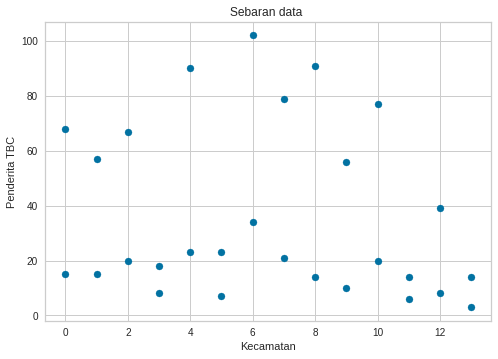

In [19]:
kec = data_group.iloc[:,0]
penderita = data_group.iloc[:,2]

plt.scatter(kec,penderita)
plt.ylabel('Penderita TBC')
plt.xlabel('Kecamatan')
plt.title('Sebaran data ')
plt.show()

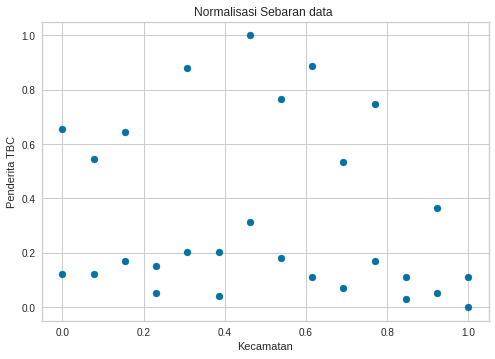

In [20]:
# kec = data_group.pembayaran_t
# kec = data_group[:,0]
# penderita = data_group[:,2]

kec_normalisasi = data_group.iloc[:,3]
penderita_normalisasi = data_group.iloc[:,5]

plt.scatter(kec_normalisasi,penderita_normalisasi)
plt.ylabel('Penderita TBC')
plt.xlabel('Kecamatan')
plt.title('Normalisasi Sebaran data ')
plt.show()


# 3. Penentuan Jumlah Kluster   
proses penentuan kluster (k) menggunakan elbow method

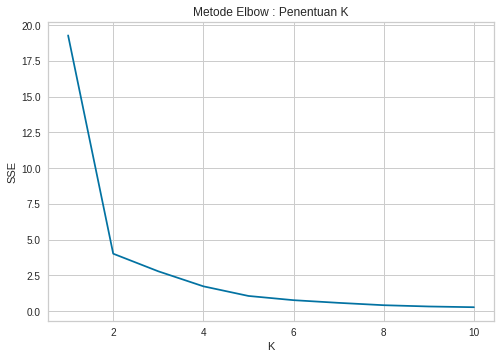

0.766517490682215


In [21]:
X =  data_group.drop(['kec','jumlah_penderita'],axis=1)

sse = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init = 'k-means++', random_state = 42 )
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.plot(range(1,11),sse)
plt.title('Metode Elbow : Penentuan K')
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()

print(sse[5])
    

Dilihat dari nilai **elbow method**, nilai K yang paling optimum adalah **3**  maka otomatis nilai centroid juga adalah 3 

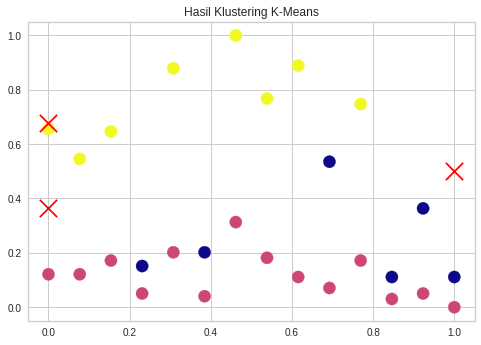

In [33]:
kmeans = KMeans(n_clusters = 3, random_state=120, max_iter=300)
kmeans.fit(X)
# y_kmeans = kmeans.predict(X)
X["kluster"] = kmeans.labels_
centers = kmeans.cluster_centers_

plt.scatter(X['kec_t'], X['jumlah_penderita_t'], c = kmeans.labels_ ,  marker="o", cmap='plasma' , s = 150);
plt.scatter(centers[:,0], centers[:,1] , c='red', s=300, alpha=1 , marker="x", );

plt.title("Hasil Klustering K-Means")
plt.show()

# # centroid coordinate
# X



# plt.hist(X['kluster'])